# Database Movies Analysis with Python 


## Import Libraries

In [288]:
#import Libraries
import pandas as pd
import numpy as np
import  pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Connection

In [289]:
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-60KJC8N;'
    'DATABASE=Movies;'
    'Trusted_Connection=yes;'
)
cursor = conn.cursor()

## Extract & Transform Data Informations 

### Extract Tables Name

In [290]:
query = """
SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE'
"""

# Execute the query
cursor.execute(query)

In [291]:
tables = cursor.fetchall()
tableslist=[]
for table in tables:
    tableslist.append(table[0])
    #store tables in a list

#remove unwanted tables
tableslist.remove('sysdiagrams')

In [292]:
#Print tables
for table in tableslist:
    print(table)

tblDirector
tblCountry
tblCertificate
tblCast
tblActor
tblStudio
tblLanguage
tblGenre
tblFilm


### Stroe Tables Content in Dictionary

In [293]:
#store Tables in Dictonary
TableContents = {}

#store Columns in Dictonary
for table in tableslist:
    query = f"SELECT * FROM {table}"
    df =pd.read_sql_query(query, conn)
    TableContents[table]=df

C:\Users\Fares Ashraf\AppData\Local\Temp\ipykernel_11300\1993257115.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =pd.read_sql_query(query, conn)


### Display Tables Content

In [294]:
#Display Content
for key , value in TableContents.items():
    print(key,":",value)
    print("\n")

tblDirector :      DirectorID                      DirectorName DirectorDOB DirectorGender
0             4                  Steven Spielberg  1946-12-18           Male
1             5                         Joel Coen  1954-11-29           Male
2             6                        Ethan Coen  1957-09-21           Male
3             7                      George Lucas  1944-05-14           Male
4             8                           Ang Lee  1954-10-23           Male
5             9                   Martin Scorsese  1942-11-17           Male
6            10                    Clint Eastwood  1930-05-31           Male
7            11                         Sam Raimi  1959-10-23           Male
8            12                     Peter Jackson  1961-10-31           Male
9            14                      Bryan Singer  1965-09-17           Male
10           15                     James Cameron  1954-08-16           Male
11           16                       Tom Shadyac  1958-12-11 

In [295]:
print(TableContents["tblActor"].head(10))
print("\n")
print(TableContents["tblDirector"].head(10))
print("\n")
print(TableContents["tblFilm"])


   ActorID             ActorName            ActorDOB ActorGender
0        1            Tom Cruise 1962-07-03 09:53:21        Male
1        2             Sam Neill 1947-09-14 00:00:00        Male
2        3            Laura Dern 1967-02-10 00:00:00      Female
3        4         Jeff Goldblum 1952-10-22 00:00:00        Male
4        5  Richard Attenborough 1923-08-29 00:00:00        Male
5        6     Samuel L. Jackson 1948-12-21 00:00:00        Male
6        7         Tobey Maguire 1975-06-27 00:00:00        Male
7        8          Willem Dafoe 1955-07-22 00:00:00        Male
8        9         Kirsten Dunst 1982-04-30 00:00:00      Female
9       10           Naomi Watts 1968-09-28 00:00:00      Female


   DirectorID      DirectorName DirectorDOB DirectorGender
0           4  Steven Spielberg  1946-12-18           Male
1           5         Joel Coen  1954-11-29           Male
2           6        Ethan Coen  1957-09-21           Male
3           7      George Lucas  1944-05-14    

### Explorare and Understand Our Data

#### Explorer Info For Each Table

In [296]:

pd.set_option('display.max_columns', None)
for tablename in TableContents.keys():
    print(tablename)
    TableContents[tablename].info()
    print("\n ###############################")

tblDirector
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DirectorID      121 non-null    int64         
 1   DirectorName    121 non-null    object        
 2   DirectorDOB     109 non-null    datetime64[ns]
 3   DirectorGender  121 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.9+ KB

 ###############################
tblCountry
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryID    8 non-null      int64 
 1   CountryName  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes

 ###############################
tblCertificate
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 

#### Data Cleaning & Transformation

##### Work With Nulls

In [297]:
#check for nulls for each table
for table , columns in TableContents.items():
    print(f"-------------{table}---------")
    for column in columns:
        print(column ,TableContents[table][column].isnull().sum())


-------------tblDirector---------
DirectorID 0
DirectorName 0
DirectorDOB 12
DirectorGender 0
-------------tblCountry---------
CountryID 0
CountryName 0
-------------tblCertificate---------
CertificateID 0
Certificate 0
-------------tblCast---------
CastID 0
CastFilmID 0
CastActorID 0
CastCharacterName 0
-------------tblActor---------
ActorID 0
ActorName 0
ActorDOB 1
ActorGender 0
-------------tblStudio---------
StudioID 0
StudioName 0
-------------tblLanguage---------
LanguageID 0
Language 0
-------------tblGenre---------
GenreId 0
GenreName 0
-------------tblFilm---------
FilmID 0
FilmName 0
FilmReleaseDate 0
FilmDirectorID 0
FilmLanguageID 0
FilmCountryID 0
FilmStudioID 1
FilmSynopsis 0
FilmRunTimeMinutes 0
FilmCertificateID 100
FilmBudgetDollars 2
FilmBoxOfficeDollars 8
FilmOscarNominations 0
FilmOscarWins 0


In [298]:
#replace Nulls for each table expect tblFilm
for table , columns in TableContents.items():
    if table != "tblFilm":
        TableContents[table] = TableContents[table].fillna("None")

In [299]:
#work with TblFilm 
#replace Null values with 0
TableContents["tblFilm"]["FilmCertificateID"] = TableContents["tblFilm"]["FilmCertificateID"].fillna(0)
#replace Null values with mean
TableContents["tblFilm"]["FilmBoxOfficeDollars"] = TableContents["tblFilm"]["FilmBoxOfficeDollars"].fillna(np.mean(TableContents["tblFilm"]["FilmBoxOfficeDollars"]))
TableContents["tblFilm"]["FilmBudgetDollars"] = TableContents["tblFilm"]["FilmBudgetDollars"].fillna(np.mean(TableContents["tblFilm"]["FilmBudgetDollars"]))
TableContents["tblFilm"]["FilmStudioID"] = TableContents["tblFilm"]["FilmStudioID"].replace(np.nan, "Unkown") 


In [300]:
#check for nulls again after cleaning
for table , columns in TableContents.items():
    print(f"-------------{table}---------")
    for column in columns:
        print(column ,TableContents[table][column].isnull().sum())


-------------tblDirector---------
DirectorID 0
DirectorName 0
DirectorDOB 0
DirectorGender 0
-------------tblCountry---------
CountryID 0
CountryName 0
-------------tblCertificate---------
CertificateID 0
Certificate 0
-------------tblCast---------
CastID 0
CastFilmID 0
CastActorID 0
CastCharacterName 0
-------------tblActor---------
ActorID 0
ActorName 0
ActorDOB 0
ActorGender 0
-------------tblStudio---------
StudioID 0
StudioName 0
-------------tblLanguage---------
LanguageID 0
Language 0
-------------tblGenre---------
GenreId 0
GenreName 0
-------------tblFilm---------
FilmID 0
FilmName 0
FilmReleaseDate 0
FilmDirectorID 0
FilmLanguageID 0
FilmCountryID 0
FilmStudioID 0
FilmSynopsis 0
FilmRunTimeMinutes 0
FilmCertificateID 0
FilmBudgetDollars 0
FilmBoxOfficeDollars 0
FilmOscarNominations 0
FilmOscarWins 0


##### Work with Duplicates


In [301]:
#check duplicates for each table
for table in TableContents.keys():
    print(f"-------{table}-------")
    print (TableContents[table].duplicated().sum())
    # for column in columns:

-------tblDirector-------
0
-------tblCountry-------
0
-------tblCertificate-------
0
-------tblCast-------
0
-------tblActor-------
0
-------tblStudio-------
0
-------tblLanguage-------
0
-------tblGenre-------
0
-------tblFilm-------
0


##### Create Column FilmProfit in tblFilm

In [302]:
#create column
TableContents["tblFilm"]["FilmProfit"] = TableContents["tblFilm"]["FilmBoxOfficeDollars"] - TableContents["tblFilm"]["FilmBudgetDollars"]

In [303]:
TableContents["tblFilm"].head()

,FilmID,FilmName,FilmReleaseDate,FilmDirectorID,FilmLanguageID,FilmCountryID,FilmStudioID,FilmSynopsis,FilmRunTimeMinutes,FilmCertificateID,FilmBudgetDollars,FilmBoxOfficeDollars,FilmOscarNominations,FilmOscarWins,FilmProfit
0,1,Jurassic Park,1993-07-16,4,1,241,1.0,Scientists clone dinosaurs to populate a theme...,127,2.0,63000000.0,9.201000e+08,3,3,8.571000e+08
1,2,Spider-Man,2002-06-14,11,1,241,5.0,"When bitten by a genetically modified spider, ...",121,4.0,139000000.0,8.216064e+08,2,0,6.826064e+08
2,3,King Kong,2005-12-15,12,1,241,1.0,"In 1933 New York, an overly ambitious movie pr...",187,4.0,207000000.0,5.503168e+08,4,3,3.433168e+08
3,5,Superman Returns,2006-07-16,14,1,241,6.0,After a long visit to the lost remains of the ...,154,4.0,204000000.0,3.911200e+08,1,0,1.871200e+08
4,6,Titanic,1998-01-23,15,1,241,4.0,Fictional romantic tale of a rich girl and poo...,194,3.0,200000000.0,1.835400e+09,14,11,1.635400e+09


## Answering Business Questions With Our Data !


#### Q1 - Does the release date of a film affect its profitability?


    ReleaseYear  FilmProfit
0          1933   9330000.0
10         1976  57014445.0
2          1963  58567035.0
5          1967  65922359.0
6          1969  74000000.0


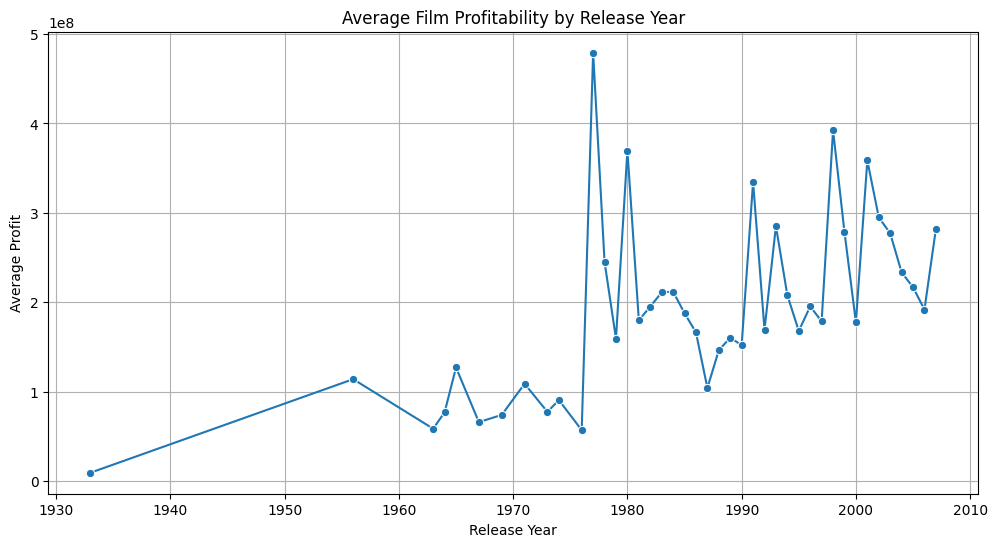

In [304]:
TableContents['tblFilm']['ReleaseYear'] = TableContents['tblFilm']['FilmReleaseDate'].dt.year
release_year_profit = TableContents['tblFilm'].groupby('ReleaseYear')['FilmProfit'].mean().reset_index()
release_year_profit.sort_values('FilmProfit', inplace=True)
print(release_year_profit.head())
plt.figure(figsize=(12, 6))
sns.lineplot(data=release_year_profit, x='ReleaseYear', y='FilmProfit', marker='o')
plt.title('Average Film Profitability by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()


#### Q2 - Director Performance


In [305]:
director_performance = TableContents["tblFilm"].merge(TableContents["tblDirector"], left_on='FilmDirectorID', right_on='DirectorID')
director_performance.head()
director_avg_profit = director_performance.groupby('DirectorName')['FilmProfit'].mean().sort_values(ascending=False)
print(director_avg_profit.head(10))

DirectorName
Chris Columbus      8.152229e+08
David Yates         7.884545e+08
Gore Verbinski      7.493584e+08
Peter Jackson       7.435625e+08
George Lucas        7.178386e+08
Chris Miller        6.389571e+08
Andrew Adamson      6.373729e+08
Sam Raimi           6.335204e+08
Roland Emmerich     5.798550e+08
Richard Marquand    5.402000e+08
Name: FilmProfit, dtype: float64


#### Q3 - Actor Influence



In [306]:
actor_performance = TableContents["tblFilm"].merge(TableContents["tblCast"], left_on='FilmID', right_on='CastFilmID').merge(TableContents["tblActor"], left_on='CastActorID', right_on='ActorID')
actor_avg_profit = actor_performance.groupby('ActorName')['FilmProfit'].mean().sort_values(ascending=False)
print(actor_avg_profit.head(10))


ActorName
Billy Zane              1.635400e+09
Kate Winslet            1.635400e+09
Bill Nighy              8.590320e+08
Stellan Skarsgard       8.590320e+08
Richard Attenborough    8.571000e+08
Laura Dern              8.571000e+08
Jeff Goldblum           7.995346e+08
Kenneth Branagh         7.789879e+08
Anthony Daniels         7.713794e+08
Kenny Baker             7.713794e+08
Name: FilmProfit, dtype: float64


#### Q4 - Box Office Success Factors

In [307]:
success_factors = TableContents["tblFilm"][['FilmBoxOfficeDollars', 'FilmBudgetDollars', 'FilmProfit']]
correlation_matrix = success_factors.corr()
print(correlation_matrix)


                      FilmBoxOfficeDollars  FilmBudgetDollars  FilmProfit
FilmBoxOfficeDollars              1.000000           0.581720    0.984703
FilmBudgetDollars                 0.581720           1.000000    0.431097
FilmProfit                        0.984703           0.431097    1.000000


#### Q5 - Average profitability by language


   LanguageID  AverageProfit   Language
6           7   5.868994e+08    Aramaic
0           1   2.336220e+08    English
4           5   1.465311e+08   Mandarin
2           3   1.422871e+08     French
5           6   1.415244e+08   Japanese
7           8   7.778486e+07      Mayan
3           4   7.367536e+07     German
8           9   2.972355e+07    Russian
1           2   2.873875e+07  Cantonese


C:\Users\Fares Ashraf\AppData\Local\Temp\ipykernel_11300\2286865744.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_profit, x='Language', y='AverageProfit', palette='coolwarm')


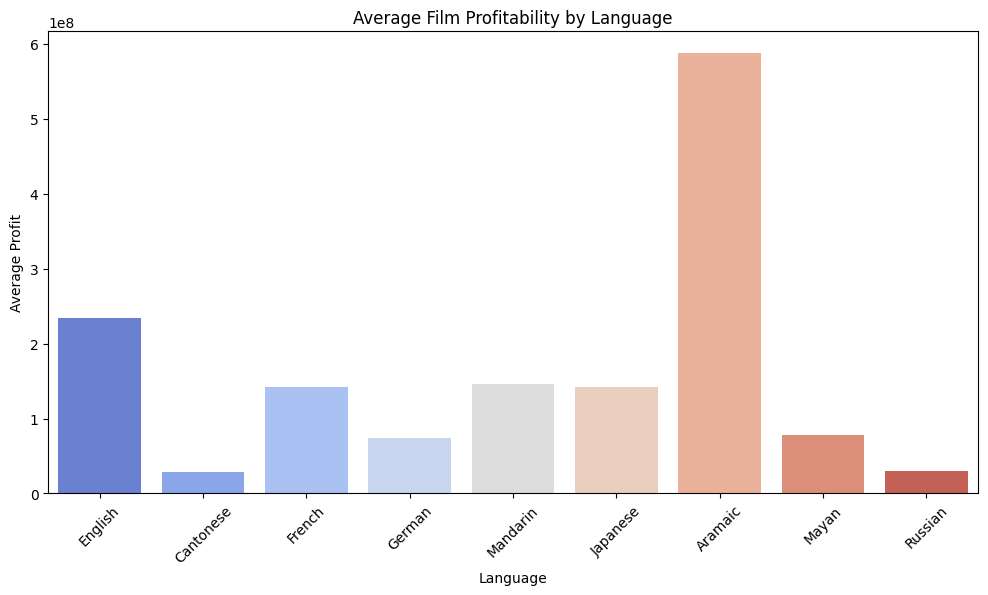

In [308]:
language_profit = TableContents['tblFilm'].groupby('FilmLanguageID')['FilmProfit'].mean().reset_index()
language_profit = language_profit.rename(columns={'FilmLanguageID': 'LanguageID', 'FilmProfit': 'AverageProfit'})
language_profit = language_profit.merge(TableContents['tblLanguage'], left_on='LanguageID', right_on='LanguageID')
print(language_profit.head(10).sort_values('AverageProfit', ascending=False))
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=language_profit, x='Language', y='AverageProfit', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Film Profitability by Language')
plt.xlabel('Language')
plt.ylabel('Average Profit')
plt.show()

#### Q6 - Are there directors who consistently produce more profitable films?

C:\Users\Fares Ashraf\AppData\Local\Temp\ipykernel_11300\1857104901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=director_profit, x='DirectorName', y='AverageProfit', palette='plasma')


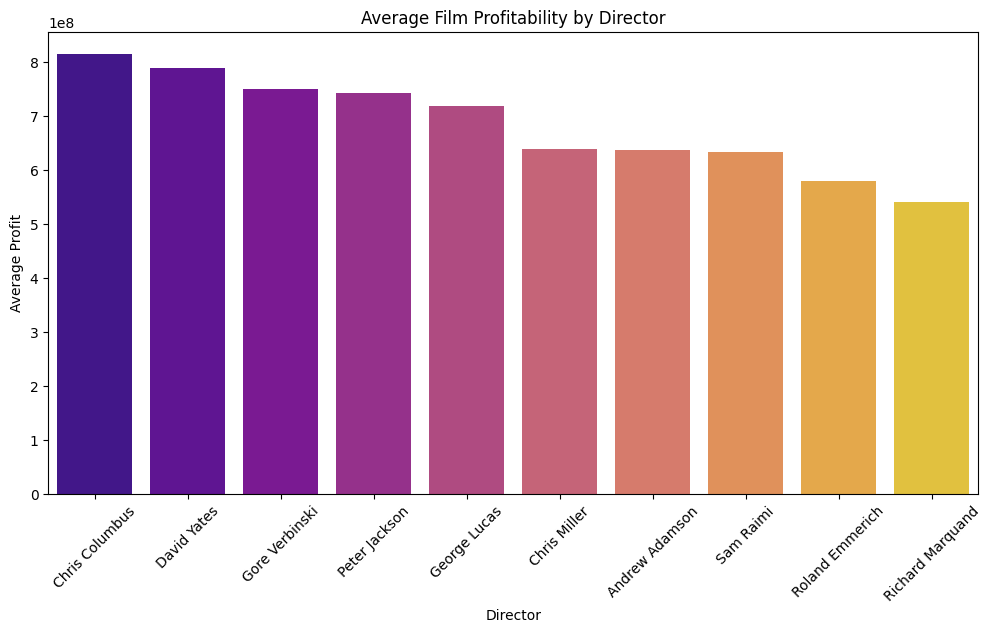

In [309]:
director_profit = TableContents['tblFilm'].groupby('FilmDirectorID')['FilmProfit'].mean().reset_index()
director_profit = director_profit.rename(columns={'FilmDirectorID': 'DirectorID', 'FilmProfit': 'AverageProfit'})
director_profit = director_profit.merge(TableContents['tblDirector'], left_on='DirectorID', right_on='DirectorID')
#top 10 directors
director_profit = director_profit.sort_values('AverageProfit', ascending=False).head(10)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=director_profit, x='DirectorName', y='AverageProfit', palette='plasma')
plt.xticks(rotation=45)
plt.title('Average Film Profitability by Director')
plt.xlabel('Director')
plt.ylabel('Average Profit')
plt.show()

#### Q7 - How does the involvement of certain actors affect the profitability of films?

C:\Users\Fares Ashraf\AppData\Local\Temp\ipykernel_11300\2184617934.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=actor_profit, x='ActorName', y='AverageProfit', palette='crest')


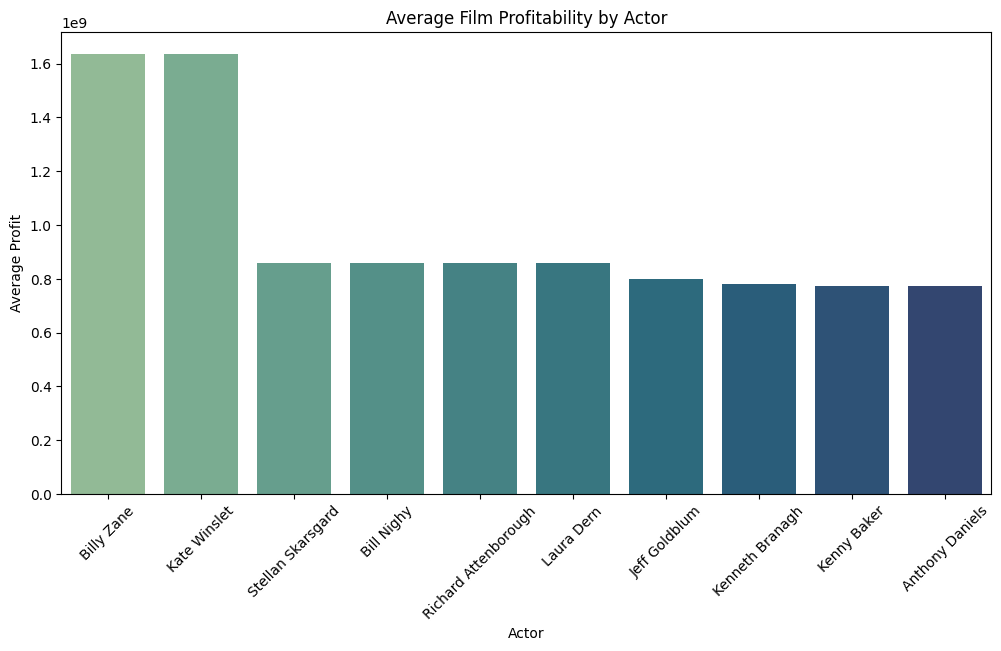

In [310]:
# Average profitability by actor
actor_profit = TableContents['tblCast'].merge(TableContents['tblFilm'], left_on='CastFilmID', right_on='FilmID')
actor_profit = actor_profit.groupby('CastActorID')['FilmProfit'].mean().reset_index()
actor_profit = actor_profit.rename(columns={'CastActorID': 'ActorID', 'FilmProfit': 'AverageProfit'})
actor_profit = actor_profit.merge(TableContents['tblActor'], left_on='ActorID', right_on='ActorID')
#TOP 10
actor_profit = actor_profit.sort_values(by = "AverageProfit" ,ascending=False).head(10)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=actor_profit, x='ActorName', y='AverageProfit', palette='crest')
plt.xticks(rotation=45)
plt.title('Average Film Profitability by Actor')
plt.xlabel('Actor')
plt.ylabel('Average Profit')
plt.show()


#### Q8 - What is the relationship between a film’s budget and its profitability?

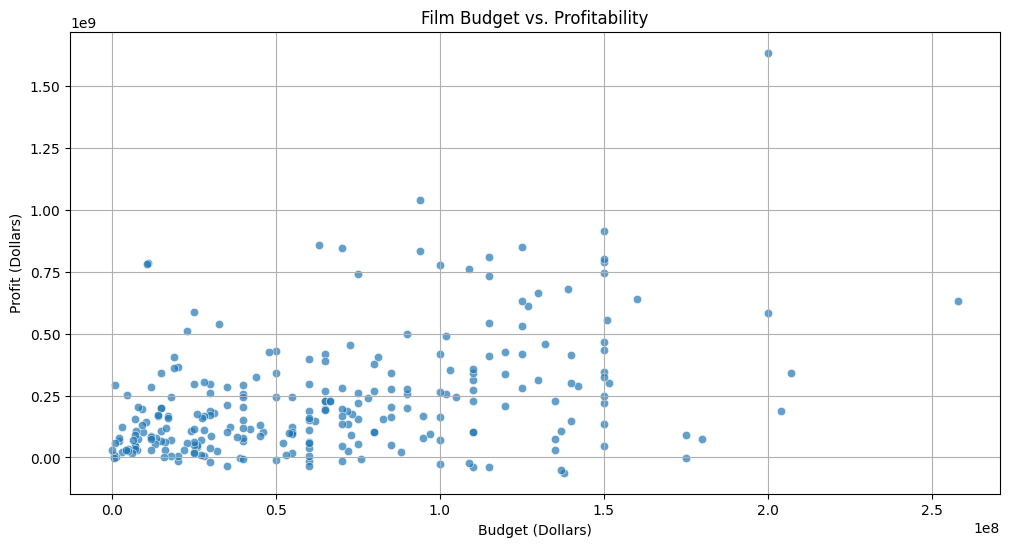

Correlation between Budget and Profitability: 0.43


In [311]:
# Scatter plot for budget vs. profitability
plt.figure(figsize=(12, 6))
sns.scatterplot(data=TableContents['tblFilm'], x='FilmBudgetDollars', y='FilmProfit', alpha=0.7)
plt.title('Film Budget vs. Profitability')
plt.xlabel('Budget (Dollars)')
plt.ylabel('Profit (Dollars)')
plt.grid(True)
plt.show()

# Correlation
correlation = TableContents['tblFilm'][['FilmBudgetDollars', 'FilmProfit']].corr().iloc[0, 1]
print(f"Correlation between Budget and Profitability: {correlation:.2f}")


#### Q9 - Heighst Film Has OscarWin

                                      FilmName  FilmOscarWins
218  The Lord of the Rings: Return of the King             11
238                                    Titanic             11
69                                      Gandhi              8
45                          Dances With Wolves              7
158                           Schindler's List              7
187         Star Wars: Episode IV - A New Hope              6
197                Terminator 2: Judgement Day              6
28                                  Braveheart              5
73                                   Gladiator              5
156                        Saving Private Ryan              5


C:\Users\Fares Ashraf\AppData\Local\Temp\ipykernel_11300\3574972367.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FilmName', y='FilmOscarWins', data=oscar_winning_films, palette='viridis')


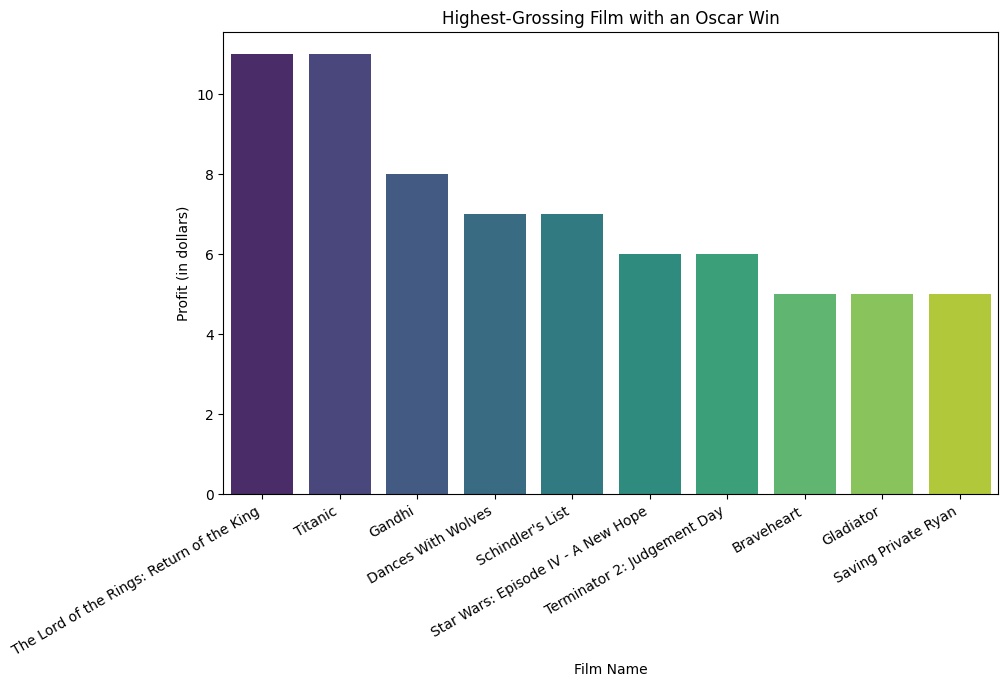

In [327]:
# Filter films that have won at least one Oscar
oscar_winning_films = TableContents['tblFilm'].groupby('FilmName')['FilmOscarWins'].sum().reset_index()
#sort
oscar_winning_films = oscar_winning_films.sort_values(by='FilmOscarWins', ascending=False).head(10)
print(oscar_winning_films)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='FilmName', y='FilmOscarWins', data=oscar_winning_films, palette='viridis')
plt.title('Highest-Grossing Film with an Oscar Win')
plt.xlabel('Film Name')
plt.ylabel('Profit (in dollars)')
plt.xticks( rotation=30,ha='right')
plt.show()


#### Q10 - Top 10 Countries By FilmProfit

C:\Users\Fares Ashraf\AppData\Local\Temp\ipykernel_11300\3738228275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CountryName', y='FilmProfit', data=top_10_countries, palette='viridis')


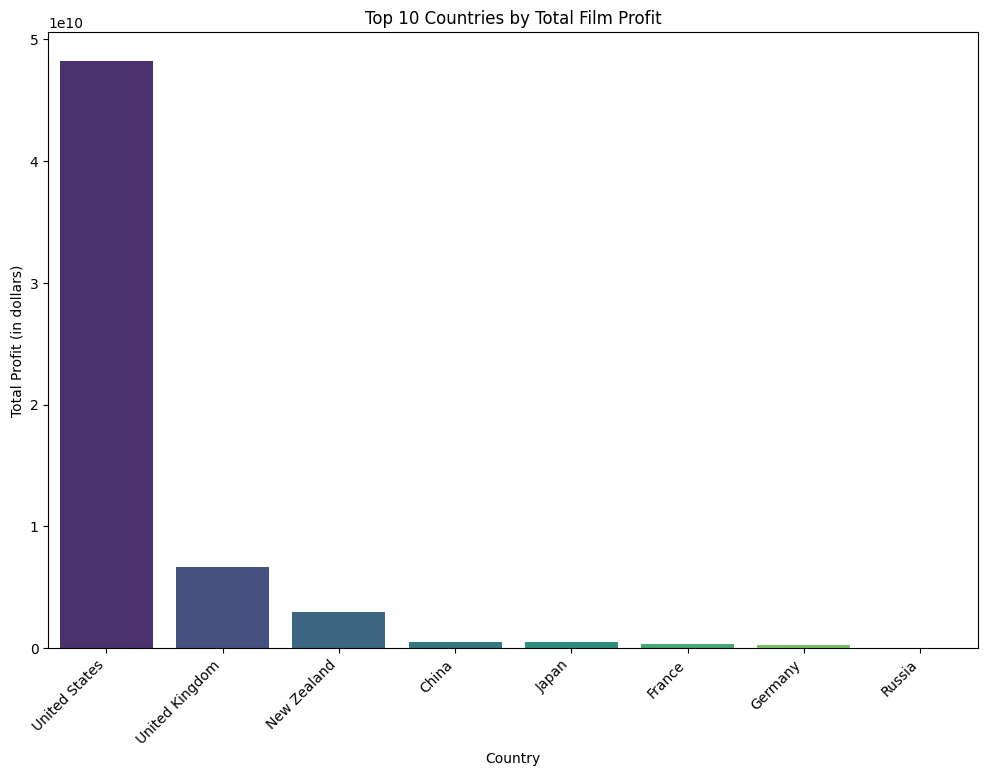

CountryName
China             (Hero, Crouching Tiger, Hidden Dragon, House o...
France                            (The Fifth Element, Leon, Amelie)
Germany                   (Downfall, Das Boot, The Lives of Others)
Japan             (Final Fantasy: The Spirits Within, Seven Samu...
New Zealand       (The Lord of the Rings: Fellowship of the Ring...
Russia                                               (Night Watch,)
United Kingdom    (Harry Potter and the Order of the Phoenix, Di...
United States     (Jurassic Park, Spider-Man, King Kong, Superma...
Name: FilmName, dtype: object

In [336]:
film_country = TableContents['tblFilm'].merge(TableContents['tblCountry'], left_on='FilmCountryID', right_on='CountryID')
country_profit = film_country.groupby('CountryName')['FilmProfit' ,].sum().reset_index()

top_10_countries = country_profit.sort_values(by='FilmProfit', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='CountryName', y='FilmProfit', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Total Film Profit')
plt.xlabel('Country')
plt.ylabel('Total Profit (in dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()



# list Films for each Country
Films_each_Country = TableContents["tblFilm"].merge(TableContents["tblCountry"], left_on="FilmCountryID", right_on="CountryID")
Films_each_Country.groupby("CountryName")["FilmName"].apply(tuple)

#                                                       Created By : Fares Ashraf ! 